## **Schapen detecteren**

### Inladen van de libraries

In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Inladen van data

(3609, 600, 600, 3)

(174, 600, 600, 3)

(350, 600, 600, 3)

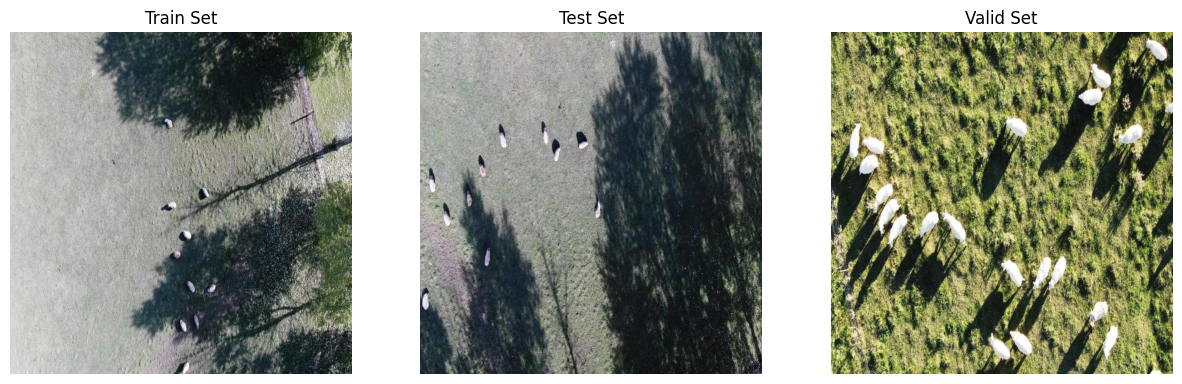

In [3]:
def laad_afbeeldingen(map_pad):
    afbeeldingen = []
    bestandsnamen = os.listdir(map_pad)

    for bestandsnaam in bestandsnamen:
        afbeelding_pad = os.path.join(map_pad, bestandsnaam)
        if os.path.isfile(afbeelding_pad):
            afbeelding = Image.open(afbeelding_pad)
            afbeeldingen.append(np.array(afbeelding))

    return np.array(afbeeldingen)

def toon_willekeurige_afbeeldingen_per_set(train_afbeeldingen, test_afbeeldingen, valid_afbeeldingen):
    train_afbeelding = train_afbeeldingen[np.random.randint(len(train_afbeeldingen))]
    test_afbeelding = test_afbeeldingen[np.random.randint(len(test_afbeeldingen))]
    valid_afbeelding = valid_afbeeldingen[np.random.randint(len(valid_afbeeldingen))]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(train_afbeelding)
    axs[0].set_title("Train Set")
    axs[0].axis('off')
    axs[1].imshow(test_afbeelding)
    axs[1].set_title("Test Set")
    axs[1].axis('off')
    axs[2].imshow(valid_afbeelding)
    axs[2].set_title("Valid Set")
    axs[2].axis('off')
    plt.show()

train_map_pad = 'train'
train_afbeeldingen = laad_afbeeldingen(train_map_pad)

test_map_pad = 'test'
test_afbeeldingen = laad_afbeeldingen(test_map_pad)

valid_map_pad = 'valid'
valid_afbeeldingen = laad_afbeeldingen(valid_map_pad)

display(train_afbeeldingen.shape, test_afbeeldingen.shape, valid_afbeeldingen.shape)
toon_willekeurige_afbeeldingen_per_set(train_afbeeldingen, test_afbeeldingen, valid_afbeeldingen)

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/vince/DatalabIV/Datalab-IV


In [5]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.26 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M3 Pro)
Setup complete ✅ (11 CPUs, 18.0 GB RAM, 307.8/460.4 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="fO4Sr4BbAbY8QjHxMyuz")
project = rf.workspace("riis").project("aerial-sheep")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: /Users/vince/DatalabIV/Datalab-IV/datasets: File exists
/Users/vince/DatalabIV/Datalab-IV/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.26, to fix: `pip install ultralytics==8.0.196`


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=800

/Users/vince/DatalabIV/Datalab-IV
New https://pypi.org/project/ultralytics/8.1.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/vince/DatalabIV/Datalab-IV/datasets/Aerial-Sheep-1/data.yaml, epochs=1, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fa

In [26]:
def load_images_from_file_paths(file_paths):
    images = []
    for file_path in file_paths:
        try:
            image = Image.open(file_path)
            images.append(image)
        except Exception as e:
            print(f"Fout bij het openen van afbeelding {file_path}: {e}")
    return images

### DataFrames maken

In [32]:
# Groepen op bestandsnaam en aantal schapen tellen
aantal_schapen_per_afbeelding = train_annotaties_df.groupby('filename').size().reset_index(name='aantal_schapen')

train_files, test_valid_files = train_test_split(aantal_schapen_per_afbeelding['filename'], test_size=0.2, random_state=42)
test_files, valid_files = train_test_split(test_valid_files, test_size=0.5, random_state=42)

# Dataframes voor de train, test en valid sets
train_df = aantal_schapen_per_afbeelding[aantal_schapen_per_afbeelding['filename'].isin(train_files)]
test_df = pd.DataFrame({'filename': test_files})
valid_df = pd.DataFrame({'filename': valid_files})

train_folder_files = [os.path.join(train_map_pad, filename) for filename in os.listdir(train_map_pad) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
test_folder_files = [os.path.join(test_map_pad, filename) for filename in os.listdir(test_map_pad) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
valid_folder_files = [os.path.join(valid_map_pad, filename) for filename in os.listdir(valid_map_pad) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Maak dataframes met de werkelijke bestandsnamen
train_df = pd.DataFrame({'filename': train_folder_files})
test_df = pd.DataFrame({'filename': test_folder_files})
valid_df = pd.DataFrame({'filename': valid_folder_files})

# Laad train-, test- en validatieafbeeldingen
train_images = load_images_from_file_paths(train_df['filename'].values)
test_images = load_images_from_file_paths(test_df['filename'].values)
valid_images = load_images_from_file_paths(valid_df['filename'].values)

# Sluit de geopende afbeeldingen om te voorkomen dat er te veel bestanden open blijven
for image in train_images + test_images + valid_images:
    image.close()

# Print de lengtes van de sets
print("Train set lengte:", len(train_df))
print("Test set lengte:", len(test_df))
print("Valid set lengte:", len(valid_df))

Train set lengte: 3609
Test set lengte: 174
Valid set lengte: 350


### **Data preprocessing**

In [33]:
train_df

,filename
0,train/DJI_0040_MOV-155_jpg.rf.92c77235165acc3a...
1,train/DJI_0040_MOV-94_jpg.rf.775b4f3284c408457...
2,train/img_063_jpg.rf.d21a533b99b88f3542aae6350...
3,train/DJI_0039_MOV-181_jpg.rf.2813636344ceb345...
4,train/DJI_0039_MOV-132_jpg.rf.15b6eb8d48b12a31...
...,...
3604,train/DJI_0043_MOV-240_jpg.rf.b500a49dd9550028...
3605,train/DJI_0040_MOV-125_jpg.rf.fb00a71b8df9f15b...
3606,train/DJI_0039_MOV-190_jpg.rf.f68395b846bc558d...
3607,train/DJI_0043_MOV-126_jpg.rf.e538f65c02d02a64...


In [34]:
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.basename(x))
test_df['filename'] = test_df['filename'].apply(lambda x: os.path.basename(x))
valid_df['filename'] = valid_df['filename'].apply(lambda x: os.path.basename(x))

In [35]:
merge_df['filename'] = merge_df['filename'].apply(lambda x: os.path.normpath(x))
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.normpath(x))

# Merge de dataframes op 'filename'
train_df = pd.merge(train_df, merge_df, on='filename', how='left')
train_df

,filename,aantal_schapen
0,DJI_0040_MOV-155_jpg.rf.92c77235165acc3afda743...,89.0
1,DJI_0040_MOV-94_jpg.rf.775b4f3284c40845700dcc2...,95.0
2,img_063_jpg.rf.d21a533b99b88f3542aae63506a0a88...,5.0
3,DJI_0039_MOV-181_jpg.rf.2813636344ceb345431f9b...,42.0
4,DJI_0039_MOV-132_jpg.rf.15b6eb8d48b12a3199cfe6...,52.0
...,...,...
3604,DJI_0043_MOV-240_jpg.rf.b500a49dd955002877b63d...,34.0
3605,DJI_0040_MOV-125_jpg.rf.fb00a71b8df9f15b04934d...,96.0
3606,DJI_0039_MOV-190_jpg.rf.f68395b846bc558dcab349...,49.0
3607,DJI_0043_MOV-126_jpg.rf.e538f65c02d02a6417d23e...,23.0


In [10]:
display(train_df.head(5))
display(test_df.head(5))
display(valid_df.head(5))

,filename,aantal_schapen
0,DJI_0040_MOV-155_jpg.rf.92c77235165acc3afda743...,89.0
1,DJI_0040_MOV-94_jpg.rf.775b4f3284c40845700dcc2...,95.0
2,img_063_jpg.rf.d21a533b99b88f3542aae63506a0a88...,5.0
3,DJI_0039_MOV-181_jpg.rf.2813636344ceb345431f9b...,42.0
4,DJI_0039_MOV-132_jpg.rf.15b6eb8d48b12a3199cfe6...,52.0


,filename
0,DJI_0043_MOV-202_jpg.rf.1cfaf478eb6208da81f1fb...
1,DJI_0043_MOV-233_jpg.rf.13fffc795428529df3e452...
2,DJI_0040_MOV-69_jpg.rf.3cac881015eed2ac76de36f...
3,DJI_0040_MOV-82_jpg.rf.144da1b47fbc4e2b9c9ec87...
4,img_23598_jpg.rf.e51f00b1d13dd201787e233c1ab7c...


,filename
0,DJI_0039_MOV-193_jpg.rf.a1abcfe7d94fe5ff574c74...
1,img_325_jpg.rf.9e21284ae6b206c2b530a7090599ae3...
2,DJI_0004_0287_jpg.rf.c4f3ea1b811cf20aff494d9bc...
3,DJI_0040_MOV-238_jpg.rf.dc88f6d1c2d1880346a55e...
4,DJI_0043_MOV-55_jpg.rf.0c4ab4768a438e2babb775e...


## EDA Afbeeldingen

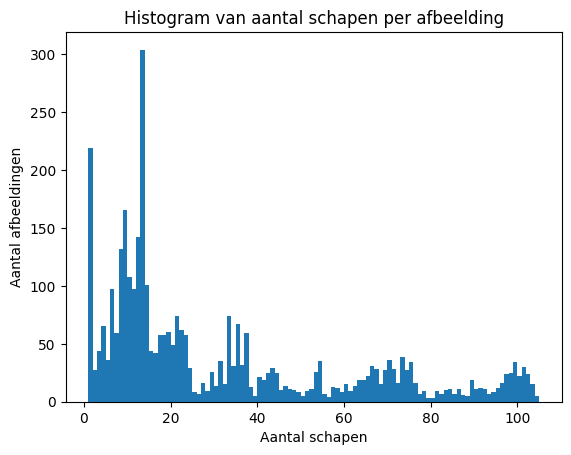

count    3602.000000
mean       31.521932
std        29.066676
min         1.000000
25%        10.000000
50%        19.000000
75%        48.000000
max       105.000000
Name: aantal_schapen, dtype: float64
Modus: 0    13.0
Name: aantal_schapen, dtype: float64


In [11]:
min_aantal_schapen = train_df['aantal_schapen'].min()
max_aantal_schapen = train_df['aantal_schapen'].max()

plt.hist(train_df['aantal_schapen'], bins=range(int(min_aantal_schapen), int(max_aantal_schapen)+1))
plt.title('Histogram van aantal schapen per afbeelding')
plt.xlabel('Aantal schapen')
plt.ylabel('Aantal afbeeldingen')
plt.show()

print(train_df["aantal_schapen"].describe())

print("Modus:", train_df["aantal_schapen"].mode())

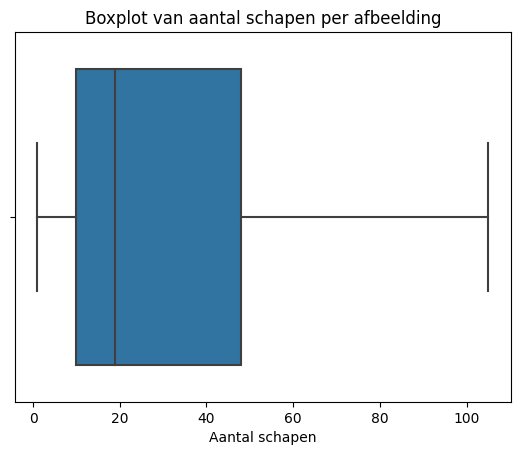

In [12]:
sns.boxplot(x=train_df['aantal_schapen'])
plt.title('Boxplot van aantal schapen per afbeelding')
plt.xlabel('Aantal schapen')
plt.show()

### Model